In [100]:
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

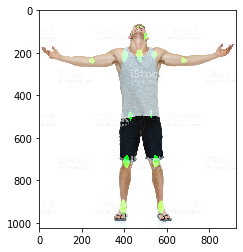

In [78]:
output_3d = None
output_2d = None

with open("open_arms/open_arms_2d", "rb") as f:
    output_2d = pickle.load(f)
with open("open_arms/open_arms_3d", "rb") as f:
    output_3d = pickle.load(f)
img = cv2.imread('open_arms/output.png')
# img = cv2.imread('open_arms/open_arms_2d_est.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

#### Explanation of general Structure

In [40]:
output_2d.shape

(1, 58)

In [41]:
output_2d

array([[ 4.6800000e+02,  2.0400000e+02,  9.4679272e-01,  4.6800000e+02,
         8.4000000e+01,  7.9522622e-01, -1.0000000e+00, -1.0000000e+00,
        -1.0000000e+00,  5.5600000e+02,  2.0400000e+02,  9.0535182e-01,
         6.9200000e+02,  2.3600000e+02,  9.7329307e-01,  8.2000000e+02,
         2.1200000e+02,  9.2068040e-01,  5.3200000e+02,  5.0000000e+02,
         7.8664982e-01,  5.4800000e+02,  7.2400000e+02,  8.5479528e-01,
         5.7200000e+02,  9.3200000e+02,  8.6326826e-01,  3.7200000e+02,
         2.1200000e+02,  9.0301907e-01,  2.4400000e+02,  2.3600000e+02,
         9.3274993e-01,  1.0800000e+02,  2.2800000e+02,  9.4893259e-01,
         4.2800000e+02,  5.0000000e+02,  7.7029103e-01,  4.1200000e+02,
         7.2400000e+02,  8.6066049e-01,  3.9600000e+02,  9.2400000e+02,
         8.7252277e-01,  4.6000000e+02,  7.6000000e+01,  7.6979285e-01,
         4.9200000e+02,  7.6000000e+01,  7.8465724e-01,  4.2800000e+02,
         1.1600000e+02,  7.2674561e-01,  5.0800000e+02,  1.16000

In [16]:
output_2d[0]

array([ 4.6800000e+02,  2.0400000e+02,  9.4679272e-01,  4.6800000e+02,
        8.4000000e+01,  7.9522622e-01, -1.0000000e+00, -1.0000000e+00,
       -1.0000000e+00,  5.5600000e+02,  2.0400000e+02,  9.0535182e-01,
        6.9200000e+02,  2.3600000e+02,  9.7329307e-01,  8.2000000e+02,
        2.1200000e+02,  9.2068040e-01,  5.3200000e+02,  5.0000000e+02,
        7.8664982e-01,  5.4800000e+02,  7.2400000e+02,  8.5479528e-01,
        5.7200000e+02,  9.3200000e+02,  8.6326826e-01,  3.7200000e+02,
        2.1200000e+02,  9.0301907e-01,  2.4400000e+02,  2.3600000e+02,
        9.3274993e-01,  1.0800000e+02,  2.2800000e+02,  9.4893259e-01,
        4.2800000e+02,  5.0000000e+02,  7.7029103e-01,  4.1200000e+02,
        7.2400000e+02,  8.6066049e-01,  3.9600000e+02,  9.2400000e+02,
        8.7252277e-01,  4.6000000e+02,  7.6000000e+01,  7.6979285e-01,
        4.9200000e+02,  7.6000000e+01,  7.8465724e-01,  4.2800000e+02,
        1.1600000e+02,  7.2674561e-01,  5.0800000e+02,  1.1600000e+02,
      

In [15]:
output_2d[0][0:-1]

array([ 4.6800000e+02,  2.0400000e+02,  9.4679272e-01,  4.6800000e+02,
        8.4000000e+01,  7.9522622e-01, -1.0000000e+00, -1.0000000e+00,
       -1.0000000e+00,  5.5600000e+02,  2.0400000e+02,  9.0535182e-01,
        6.9200000e+02,  2.3600000e+02,  9.7329307e-01,  8.2000000e+02,
        2.1200000e+02,  9.2068040e-01,  5.3200000e+02,  5.0000000e+02,
        7.8664982e-01,  5.4800000e+02,  7.2400000e+02,  8.5479528e-01,
        5.7200000e+02,  9.3200000e+02,  8.6326826e-01,  3.7200000e+02,
        2.1200000e+02,  9.0301907e-01,  2.4400000e+02,  2.3600000e+02,
        9.3274993e-01,  1.0800000e+02,  2.2800000e+02,  9.4893259e-01,
        4.2800000e+02,  5.0000000e+02,  7.7029103e-01,  4.1200000e+02,
        7.2400000e+02,  8.6066049e-01,  3.9600000e+02,  9.2400000e+02,
        8.7252277e-01,  4.6000000e+02,  7.6000000e+01,  7.6979285e-01,
        4.9200000e+02,  7.6000000e+01,  7.8465724e-01,  4.2800000e+02,
        1.1600000e+02,  7.2674561e-01,  5.0800000e+02,  1.1600000e+02,
      

In [10]:
# In this step each row represents (X, Y, probability)
# if there is no data found probability == -1 
# You can see it for body center at index 2

output_2d[0][0:-1].reshape((-1, 3))

array([[ 4.6800000e+02,  2.0400000e+02,  9.4679272e-01],
       [ 4.6800000e+02,  8.4000000e+01,  7.9522622e-01],
       [-1.0000000e+00, -1.0000000e+00, -1.0000000e+00],
       [ 5.5600000e+02,  2.0400000e+02,  9.0535182e-01],
       [ 6.9200000e+02,  2.3600000e+02,  9.7329307e-01],
       [ 8.2000000e+02,  2.1200000e+02,  9.2068040e-01],
       [ 5.3200000e+02,  5.0000000e+02,  7.8664982e-01],
       [ 5.4800000e+02,  7.2400000e+02,  8.5479528e-01],
       [ 5.7200000e+02,  9.3200000e+02,  8.6326826e-01],
       [ 3.7200000e+02,  2.1200000e+02,  9.0301907e-01],
       [ 2.4400000e+02,  2.3600000e+02,  9.3274993e-01],
       [ 1.0800000e+02,  2.2800000e+02,  9.4893259e-01],
       [ 4.2800000e+02,  5.0000000e+02,  7.7029103e-01],
       [ 4.1200000e+02,  7.2400000e+02,  8.6066049e-01],
       [ 3.9600000e+02,  9.2400000e+02,  8.7252277e-01],
       [ 4.6000000e+02,  7.6000000e+01,  7.6979285e-01],
       [ 4.9200000e+02,  7.6000000e+01,  7.8465724e-01],
       [ 4.2800000e+02,  1.1600

In [7]:
# First array includes X values
# Second array includes Y values
# Third array includes Probablity values
np.array(output_2d[0][0:-1]).reshape((-1, 3)).transpose()

array([[ 4.6800000e+02,  4.6800000e+02, -1.0000000e+00,  5.5600000e+02,
         6.9200000e+02,  8.2000000e+02,  5.3200000e+02,  5.4800000e+02,
         5.7200000e+02,  3.7200000e+02,  2.4400000e+02,  1.0800000e+02,
         4.2800000e+02,  4.1200000e+02,  3.9600000e+02,  4.6000000e+02,
         4.9200000e+02,  4.2800000e+02,  5.0800000e+02],
       [ 2.0400000e+02,  8.4000000e+01, -1.0000000e+00,  2.0400000e+02,
         2.3600000e+02,  2.1200000e+02,  5.0000000e+02,  7.2400000e+02,
         9.3200000e+02,  2.1200000e+02,  2.3600000e+02,  2.2800000e+02,
         5.0000000e+02,  7.2400000e+02,  9.2400000e+02,  7.6000000e+01,
         7.6000000e+01,  1.1600000e+02,  1.1600000e+02],
       [ 9.4679272e-01,  7.9522622e-01, -1.0000000e+00,  9.0535182e-01,
         9.7329307e-01,  9.2068040e-01,  7.8664982e-01,  8.5479528e-01,
         8.6326826e-01,  9.0301907e-01,  9.3274993e-01,  9.4893259e-01,
         7.7029103e-01,  8.6066049e-01,  8.7252277e-01,  7.6979285e-01,
         7.8465724e-01

In [35]:
output_3d.shape[1]

76

In [31]:
output_3d[0]

array([  1.7042829 , -48.80735   , 117.6024    ,   0.9467927 ,
         1.6428919 , -64.92284   , 103.97016   ,   0.7952262 ,
         2.6514637 ,   0.4538461 , 123.68647   ,  -1.        ,
        14.399295  , -51.475468  , 124.7803    ,   0.9053518 ,
        38.083683  , -40.8102    , 124.079     ,   0.97329307,
        58.474243  , -45.775066  , 110.81941   ,   0.9206804 ,
         8.101814  ,  -1.6204299 , 131.71086   ,   0.7866498 ,
        12.644009  ,  33.131016  , 143.01453   ,   0.8547953 ,
        18.135437  ,  67.72632   , 157.54741   ,   0.86326826,
        -9.098     , -49.782078  , 116.98078   ,   0.9030191 ,
       -35.90142   , -44.803444  , 121.69339   ,   0.9327499 ,
       -48.46699   , -54.038162  , 118.40572   ,   0.9489326 ,
       -10.999873  ,  -1.6697692 , 131.37958   ,   0.77029103,
       -12.438702  ,  33.04743   , 140.95082   ,   0.8606605 ,
       -12.462727  ,  67.656525  , 157.04054   ,   0.8725228 ,
         1.4587829 , -65.916626  , 104.7222    ,   0.76

In [19]:
# Same structure [X, Y, Z, proba]

output_3d[0].reshape((-1, 4))

array([[  1.7042829 , -48.80735   , 117.6024    ,   0.9467927 ],
       [  1.6428919 , -64.92284   , 103.97016   ,   0.7952262 ],
       [  2.6514637 ,   0.4538461 , 123.68647   ,  -1.        ],
       [ 14.399295  , -51.475468  , 124.7803    ,   0.9053518 ],
       [ 38.083683  , -40.8102    , 124.079     ,   0.97329307],
       [ 58.474243  , -45.775066  , 110.81941   ,   0.9206804 ],
       [  8.101814  ,  -1.6204299 , 131.71086   ,   0.7866498 ],
       [ 12.644009  ,  33.131016  , 143.01453   ,   0.8547953 ],
       [ 18.135437  ,  67.72632   , 157.54741   ,   0.86326826],
       [ -9.098     , -49.782078  , 116.98078   ,   0.9030191 ],
       [-35.90142   , -44.803444  , 121.69339   ,   0.9327499 ],
       [-48.46699   , -54.038162  , 118.40572   ,   0.9489326 ],
       [-10.999873  ,  -1.6697692 , 131.37958   ,   0.77029103],
       [-12.438702  ,  33.04743   , 140.95082   ,   0.8606605 ],
       [-12.462727  ,  67.656525  , 157.04054   ,   0.8725228 ],
       [  1.4587829 , -65

In [43]:
# First array includes X values
# Second array includes Y values
# Third array includes Z values
# Fourth array includes Proba values 

out3d = output_3d[0].reshape((-1, 4)).transpose()
out3d

array([[  1.7042829 ,   1.6428919 ,   2.6514637 ,  14.399295  ,
         38.083683  ,  58.474243  ,   8.101814  ,  12.644009  ,
         18.135437  ,  -9.098     , -35.90142   , -48.46699   ,
        -10.999873  , -12.438702  , -12.462727  ,   1.4587829 ,
          6.3915153 ,  -2.1604683 ,  -5.3676915 ],
       [-48.80735   , -64.92284   ,   0.4538461 , -51.475468  ,
        -40.8102    , -45.775066  ,  -1.6204299 ,  33.131016  ,
         67.72632   , -49.782078  , -44.803444  , -54.038162  ,
         -1.6697692 ,  33.04743   ,  67.656525  , -65.916626  ,
        -63.372826  , -66.964226  , -64.07578   ],
       [117.6024    , 103.97016   , 123.68647   , 124.7803    ,
        124.079     , 110.81941   , 131.71086   , 143.01453   ,
        157.54741   , 116.98078   , 121.69339   , 118.40572   ,
        131.37958   , 140.95082   , 157.04054   , 104.7222    ,
        113.84957   , 106.374374  , 111.86209   ],
       [  0.9467927 ,   0.7952262 ,  -1.        ,   0.9053518 ,
          0.973

In [57]:
pos3d = out3d[:3]
axs = 'xyz'
for i in range(3):
    print('Axis ', axs[i])
    print('Max ', pos3d[i].max())
    print('Min ', pos3d[i].min())
    print('Mean ', pos3d[i].mean())
    print('Median ', np.median(pos3d[i]))
    

Axis  x
Max  58.474243
Min  -48.46699
Mean  1.4100814
Median  1.6428919
Axis  y
Max  67.72632
Min  -66.964226
Mean  -24.316797
Median  -45.775066
Axis  z
Max  157.54741
Min  103.97016
Mean  124.23524
Median  121.69339


1 -48
463 512


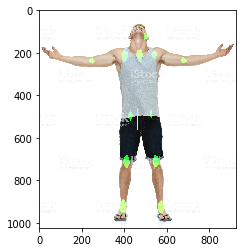

In [94]:
idx = 0
x, y, z = pos3d[0][idx], pos3d[1][idx], pos3d[2][idx]
x, y, z = int(x), int(y), int(z)
print(x, y)
midy = img.shape[0] // 2
midx = img.shape[1] // 2
print(midx, midy)
cv2.rectangle(img, (midx + x, midy + y), (midx + x + 100, midy + y + 100), (255,255,0), 2)
plt.imshow(img)

In [106]:
x = np.array([846,0.35601,0.3388,1.6443,0.3341,0.44903,1.6568,0.31309,0.56478,1.6662,0.37985,0.46075,1.7419,0.41332,0.59557,1.7707,0.46361,0.58517,1.5812,0.28835,0.43732,1.5717,0.21842,0.55566,1.519,0.29056,0.54024,1.3557,0.3216,0.68947,1.7332,0.38305,0.90577,1.6463,0.38305,1.1352,1.6463,0.26216,0.67286,1.6201,0.28909,0.88514,1.4661,0.31498,1.0893,1.318,0.73536,0.4777,1.7002,0.73008,0.58239,1.6842,0.7243,0.68872,1.6668,0.73559,0.57515,1.5726,0.68103,0.71537,1.6544,0.59005,0.72402,1.666,0.72456,0.58963,1.7959,0.69793,0.58484,1.9703,0.62178,0.49624,1.9442,0.72218,0.79016,1.5765,0.72168,0.99927,1.5168,0.72122,1.2005,1.4581,0.71492,0.79983,1.7236,0.71372,0.94824,1.5504,0.7124,1.0911,1.3826
])
x.shape
A = x[1:46]
A.shape
B = x[46:]
B.shape

(91,)

(45,)

(45,)

In [132]:
Bt = B.reshape((-1, 3))
Bt = np.hstack((Bt, np.ones((len(Bt), 1))))
Bt.reshape(-1).shape

(60,)